In [309]:
#Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

In [929]:
data = pd.read_csv("data.csv")

In [311]:
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,225520077,3126,NaN,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,786,0,2022-02-02 00:00:00,2022,2,Wednesday,0,NaN,WASHINGTON ST,42.343081,-71.141723,"(42.34308127134165, -71.14172267328729)"
1,222648862,3831,NaN,M/V - LEAVING SCENE - PROPERTY DAMAGE,B2,288,0,2022-02-05 18:25:00,2022,2,Saturday,18,NaN,WASHINGTON ST,42.329748,-71.084540,"(42.329748204791635, -71.08454011649543)"
2,222201764,724,NaN,AUTO THEFT,C6,200,0,2022-01-09 00:00:00,2022,1,Sunday,0,NaN,W BROADWAY,42.341288,-71.054679,"(42.341287504390436, -71.05467932649397)"
3,222201559,301,NaN,ROBBERY,D4,,0,2022-03-05 13:00:00,2022,3,Saturday,13,NaN,ALBANY ST,42.333184,-71.073939,"(42.333184490911954, -71.07393881002383)"
4,222111641,619,NaN,LARCENY ALL OTHERS,D14,778,0,2022-02-14 12:30:00,2022,2,Monday,12,NaN,WASHINGTON ST,42.349056,-71.150498,"(42.34905600030506, -71.15049849975023)"


In [312]:
data.shape

(15243, 17)

In [313]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15243 entries, 0 to 15242
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INCIDENT_NUMBER      15243 non-null  int64  
 1   OFFENSE_CODE         15243 non-null  int64  
 2   OFFENSE_CODE_GROUP   0 non-null      float64
 3   OFFENSE_DESCRIPTION  15243 non-null  object 
 4   DISTRICT             15199 non-null  object 
 5   REPORTING_AREA       15243 non-null  object 
 6   SHOOTING             15243 non-null  int64  
 7   OCCURRED_ON_DATE     15243 non-null  object 
 8   YEAR                 15243 non-null  int64  
 9   MONTH                15243 non-null  int64  
 10  DAY_OF_WEEK          15243 non-null  object 
 11  HOUR                 15243 non-null  int64  
 12  UCR_PART             0 non-null      float64
 13  STREET               15243 non-null  object 
 14  Lat                  15243 non-null  float64
 15  Long                 15243 non-null 

In [314]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
INCIDENT_NUMBER,15243.0,2.219363e+08,3.192184e+06,2.201172e+07,2.220052e+08,2.220104e+08,2.220155e+08,2.255201e+08
OFFENSE_CODE,15243.0,2.382078e+03,1.170778e+03,1.110000e+02,1.300000e+03,3.006000e+03,3.207000e+03,3.831000e+03
OFFENSE_CODE_GROUP,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SHOOTING,15243.0,8.462901e-03,9.160694e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
YEAR,15243.0,2.022000e+03,0.000000e+00,2.022000e+03,2.022000e+03,2.022000e+03,2.022000e+03,2.022000e+03
MONTH,15243.0,1.934593e+00,8.038007e-01,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00
HOUR,15243.0,1.278443e+01,6.446339e+00,0.000000e+00,9.000000e+00,1.400000e+01,1.800000e+01,2.300000e+01
UCR_PART,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lat,15243.0,4.052915e+01,8.526469e+00,0.000000e+00,4.229361e+01,4.232516e+01,4.234831e+01,4.239504e+01
Long,15243.0,-6.807142e+01,1.432071e+01,-7.117867e+01,-7.109845e+01,-7.107555e+01,-7.105971e+01,0.000000e+00


In [315]:
data.describe(include=np.object).T

,count,unique,top,freq
OFFENSE_DESCRIPTION,15243,112,INVESTIGATE PERSON,1716
DISTRICT,15199,13,B2,2046
REPORTING_AREA,15243,648,,10505
OCCURRED_ON_DATE,15243,12781,2022-01-13 00:00:00,25
DAY_OF_WEEK,15243,7,Thursday,2333
STREET,15243,3312,WASHINGTON ST,1182
Location,15243,5690,"(0, 0)",646


In [316]:
cat_cols=data.select_dtypes(include=['object']).columns

for column in cat_cols:
    print("For column:",column)
    print(data[column].unique())
    print('-'*50)

For column: OFFENSE_DESCRIPTION
['WARRANT ARREST - OUTSIDE OF BOSTON WARRANT'
 'M/V - LEAVING SCENE - PROPERTY DAMAGE' 'AUTO THEFT' 'ROBBERY'
 'LARCENY ALL OTHERS' 'ASSAULT - SIMPLE' 'LARCENY PICK-POCKET'
 'PROPERTY - LOST/ MISSING' 'TRESPASSING' 'TOWED MOTOR VEHICLE'
 'BURGLARY - COMMERICAL' 'HARASSMENT/ CRIMINAL HARASSMENT'
 'M/V ACCIDENT - PROPERTY DAMAGE' 'INVESTIGATE PERSON'
 'INVESTIGATE PROPERTY' 'SICK/INJURED/MEDICAL - PERSON'
 'M/V ACCIDENT - OTHER' 'M/V ACCIDENT - INVOLVING PEDESTRIAN - INJURY'
 'BREAKING AND ENTERING (B&E) MOTOR VEHICLE' 'SICK ASSIST'
 'VAL - VIOLATION OF AUTO LAW' 'M/V ACCIDENT - PERSONAL INJURY'
 'LARCENY THEFT FROM MV - NON-ACCESSORY' 'LICENSE PREMISE VIOLATION'
 'VERBAL DISPUTE' 'VANDALISM' 'BALLISTICS EVIDENCE/FOUND'
 'THREATS TO DO BODILY HARM' 'SICK ASSIST - DRUG RELATED ILLNESS'
 'FRAUD - IMPERSONATION' 'LARCENY THEFT FROM BUILDING'
 'LARCENY SHOPLIFTING' 'DRUGS - POSSESSION/ SALE/ MANUFACTURING/ USE'
 'MISSING PERSON - NOT REPORTED - LOCATED' 'LARCE

In [930]:
import pandas as pd

data["DAY"] = data['OCCURRED_ON_DATE'].str[8:10]
data["Hour"] = data['OCCURRED_ON_DATE'].str[-8:]
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,DAY,Hour
0,225520077,3126,NaN,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,786,0,2022-02-02 00:00:00,2022,2,Wednesday,0,NaN,WASHINGTON ST,42.343081,-71.141723,"(42.34308127134165, -71.14172267328729)",02,00:00:00
1,222648862,3831,NaN,M/V - LEAVING SCENE - PROPERTY DAMAGE,B2,288,0,2022-02-05 18:25:00,2022,2,Saturday,18,NaN,WASHINGTON ST,42.329748,-71.084540,"(42.329748204791635, -71.08454011649543)",05,18:25:00
2,222201764,724,NaN,AUTO THEFT,C6,200,0,2022-01-09 00:00:00,2022,1,Sunday,0,NaN,W BROADWAY,42.341288,-71.054679,"(42.341287504390436, -71.05467932649397)",09,00:00:00
3,222201559,301,NaN,ROBBERY,D4,,0,2022-03-05 13:00:00,2022,3,Saturday,13,NaN,ALBANY ST,42.333184,-71.073939,"(42.333184490911954, -71.07393881002383)",05,13:00:00
4,222111641,619,NaN,LARCENY ALL OTHERS,D14,778,0,2022-02-14 12:30:00,2022,2,Monday,12,NaN,WASHINGTON ST,42.349056,-71.150498,"(42.34905600030506, -71.15049849975023)",14,12:30:00


In [931]:
data.head(20)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,DAY,Hour
0,225520077,3126,NaN,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,786,0,2022-02-02 00:00:00,2022,2,Wednesday,0,NaN,WASHINGTON ST,42.343081,-71.141723,"(42.34308127134165, -71.14172267328729)",02,00:00:00
1,222648862,3831,NaN,M/V - LEAVING SCENE - PROPERTY DAMAGE,B2,288,0,2022-02-05 18:25:00,2022,2,Saturday,18,NaN,WASHINGTON ST,42.329748,-71.084540,"(42.329748204791635, -71.08454011649543)",05,18:25:00
2,222201764,724,NaN,AUTO THEFT,C6,200,0,2022-01-09 00:00:00,2022,1,Sunday,0,NaN,W BROADWAY,42.341288,-71.054679,"(42.341287504390436, -71.05467932649397)",09,00:00:00
3,222201559,301,NaN,ROBBERY,D4,,0,2022-03-05 13:00:00,2022,3,Saturday,13,NaN,ALBANY ST,42.333184,-71.073939,"(42.333184490911954, -71.07393881002383)",05,13:00:00
4,222111641,619,NaN,LARCENY ALL OTHERS,D14,778,0,2022-02-14 12:30:00,2022,2,Monday,12,NaN,WASHINGTON ST,42.349056,-71.150498,"(42.34905600030506, -71.15049849975023)",14,12:30:00
5,222107076,3126,NaN,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D4,,0,2022-03-11 10:45:00,2022,3,Friday,10,NaN,MASSACHUSETTS AVE & ALBANY ST\nBOSTON MA 0211...,42.333500,-71.073510,"(42.33349998017161, -71.07350999617319)",11,10:45:00
6,22209348,801,NaN,ASSAULT - SIMPLE,C6,235,0,2022-02-08 22:37:00,2022,2,Tuesday,22,NaN,DORCHESTER AVE,42.321374,-71.056795,"(42.321374273916476, -71.05679486212327)",08,22:37:00
7,222073971,611,NaN,LARCENY PICK-POCKET,A1,77,0,2022-02-27 10:07:00,2022,2,Sunday,10,NaN,NEW SUDBURY ST,42.361839,-71.059765,"(42.361838566564714, -71.05976489094158)",27,10:07:00
8,222072974,619,NaN,LARCENY ALL OTHERS,C6,186,0,2022-01-14 15:20:00,2022,1,Friday,15,NaN,ALLSTATE ROAD,0.000000,0.000000,"(0, 0)",14,15:20:00
9,222055138,3201,NaN,PROPERTY - LOST/ MISSING,E13,574,0,2022-01-23 13:15:00,2022,1,Sunday,13,NaN,WASHINGTON ST,42.309719,-71.104294,"(42.30971856767274, -71.10429431787648)",23,13:15:00


In [319]:
data.drop(['INCIDENT_NUMBER', 'OFFENSE_CODE_GROUP','STREET', 'Lat','Long','OCCURRED_ON_DATE','UCR_PART'], axis=1, inplace=True)
data.head()

,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,Location,DAY,Hour
0,3126,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,786,0,2022,2,Wednesday,0,"(42.34308127134165, -71.14172267328729)",02,00:00:00
1,3831,M/V - LEAVING SCENE - PROPERTY DAMAGE,B2,288,0,2022,2,Saturday,18,"(42.329748204791635, -71.08454011649543)",05,18:25:00
2,724,AUTO THEFT,C6,200,0,2022,1,Sunday,0,"(42.341287504390436, -71.05467932649397)",09,00:00:00
3,301,ROBBERY,D4,,0,2022,3,Saturday,13,"(42.333184490911954, -71.07393881002383)",05,13:00:00
4,619,LARCENY ALL OTHERS,D14,778,0,2022,2,Monday,12,"(42.34905600030506, -71.15049849975023)",14,12:30:00


In [932]:
data.drop(['INCIDENT_NUMBER', 'OFFENSE_CODE_GROUP','STREET', 'UCR_PART'], axis=1, inplace=True)
data.head()

,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,Lat,Long,Location,DAY,Hour
0,3126,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,786,0,2022-02-02 00:00:00,2022,2,Wednesday,0,42.343081,-71.141723,"(42.34308127134165, -71.14172267328729)",02,00:00:00
1,3831,M/V - LEAVING SCENE - PROPERTY DAMAGE,B2,288,0,2022-02-05 18:25:00,2022,2,Saturday,18,42.329748,-71.084540,"(42.329748204791635, -71.08454011649543)",05,18:25:00
2,724,AUTO THEFT,C6,200,0,2022-01-09 00:00:00,2022,1,Sunday,0,42.341288,-71.054679,"(42.341287504390436, -71.05467932649397)",09,00:00:00
3,301,ROBBERY,D4,,0,2022-03-05 13:00:00,2022,3,Saturday,13,42.333184,-71.073939,"(42.333184490911954, -71.07393881002383)",05,13:00:00
4,619,LARCENY ALL OTHERS,D14,778,0,2022-02-14 12:30:00,2022,2,Monday,12,42.349056,-71.150498,"(42.34905600030506, -71.15049849975023)",14,12:30:00


In [320]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15243 entries, 0 to 15242
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   OFFENSE_CODE         15243 non-null  int64 
 1   OFFENSE_DESCRIPTION  15243 non-null  object
 2   DISTRICT             15199 non-null  object
 3   REPORTING_AREA       15243 non-null  object
 4   SHOOTING             15243 non-null  int64 
 5   YEAR                 15243 non-null  int64 
 6   MONTH                15243 non-null  int64 
 7   DAY_OF_WEEK          15243 non-null  object
 8   HOUR                 15243 non-null  int64 
 9   Location             15243 non-null  object
 10  DAY                  15243 non-null  object
 11  Hour                 15243 non-null  object
dtypes: int64(5), object(7)
memory usage: 1.4+ MB


In [321]:
data.describe(include=np.object).T

,count,unique,top,freq
OFFENSE_DESCRIPTION,15243,112,INVESTIGATE PERSON,1716
DISTRICT,15199,13,B2,2046
REPORTING_AREA,15243,648,,10505
DAY_OF_WEEK,15243,7,Thursday,2333
Location,15243,5690,"(0, 0)",646
DAY,15243,31,18,650
Hour,15243,1428,00:00:00,630


In [322]:
cat_cols=data.columns

for column in cat_cols:
    print("For column:",column)
    print(data[column].unique())
    print('-'*50)

For column: OFFENSE_CODE
[3126 3831  724  301  619  801  611 3201 2610 3410  540 2670 3802 3115
 3114 3006 3801 3820  530 1831 2905 3803  614 3111 3301 1402 2662 2647
 1832 1107  617  613 1810 3503  616  520 2907 3007 3207 3116 3001 3807
  423 1304 1109 2619 2403  735  615 3502 3501 3018 2914 3108 2616 2646
 1102 3402 2612 3106 2401  706 1106 3119 3122 3805 2101 1501  736 3205
 3304  111 1001 3110 3810 3830  727 3811  531 3130 1300 3202 3004 3821
 1415 2613 3625 1201 3112 3170 2604  900 3125 1825 2102 3008 2648 2632
 3123 2660 2608  612 1602 1108 3029 2204 3403 2657 2622 3203 3305]
--------------------------------------------------
For column: OFFENSE_DESCRIPTION
['WARRANT ARREST - OUTSIDE OF BOSTON WARRANT'
 'M/V - LEAVING SCENE - PROPERTY DAMAGE' 'AUTO THEFT' 'ROBBERY'
 'LARCENY ALL OTHERS' 'ASSAULT - SIMPLE' 'LARCENY PICK-POCKET'
 'PROPERTY - LOST/ MISSING' 'TRESPASSING' 'TOWED MOTOR VEHICLE'
 'BURGLARY - COMMERICAL' 'HARASSMENT/ CRIMINAL HARASSMENT'
 'M/V ACCIDENT - PROPERTY DAMAGE

In [324]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15243 entries, 0 to 15242
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   OFFENSE_CODE         15243 non-null  int64 
 1   OFFENSE_DESCRIPTION  15243 non-null  object
 2   DISTRICT             15199 non-null  object
 3   REPORTING_AREA       15243 non-null  object
 4   SHOOTING             15243 non-null  int64 
 5   YEAR                 15243 non-null  int64 
 6   MONTH                15243 non-null  int64 
 7   DAY_OF_WEEK          15243 non-null  object
 8   HOUR                 15243 non-null  int64 
 9   Location             15243 non-null  object
 10  DAY                  15243 non-null  object
 11  Hour                 15243 non-null  object
dtypes: int64(5), object(7)
memory usage: 1.4+ MB


In [933]:
data.dropna()

,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,Lat,Long,Location,DAY,Hour
0,3126,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,786,0,2022-02-02 00:00:00,2022,2,Wednesday,0,42.343081,-71.141723,"(42.34308127134165, -71.14172267328729)",02,00:00:00
1,3831,M/V - LEAVING SCENE - PROPERTY DAMAGE,B2,288,0,2022-02-05 18:25:00,2022,2,Saturday,18,42.329748,-71.084540,"(42.329748204791635, -71.08454011649543)",05,18:25:00
2,724,AUTO THEFT,C6,200,0,2022-01-09 00:00:00,2022,1,Sunday,0,42.341288,-71.054679,"(42.341287504390436, -71.05467932649397)",09,00:00:00
3,301,ROBBERY,D4,,0,2022-03-05 13:00:00,2022,3,Saturday,13,42.333184,-71.073939,"(42.333184490911954, -71.07393881002383)",05,13:00:00
4,619,LARCENY ALL OTHERS,D14,778,0,2022-02-14 12:30:00,2022,2,Monday,12,42.349056,-71.150498,"(42.34905600030506, -71.15049849975023)",14,12:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15238,724,AUTO THEFT,D14,778,0,2022-03-21 20:01:00,2022,3,Monday,20,42.349056,-71.150498,"(42.34905600030506, -71.15049849975023)",21,20:01:00
15239,3831,M/V - LEAVING SCENE - PROPERTY DAMAGE,B3,465,0,2022-02-01 18:00:00,2022,2,Tuesday,18,0.000000,0.000000,"(0, 0)",01,18:00:00
15240,2101,OPERATING UNDER THE INFLUENCE (OUI) ALCOHOL,B2,,0,2022-02-12 21:54:00,2022,2,Saturday,21,0.000000,0.000000,"(0, 0)",12,21:54:00
15241,3115,INVESTIGATE PERSON,E13,912,0,2022-01-19 09:30:00,2022,1,Wednesday,9,42.325131,-71.099408,"(42.32513050637361, -71.09940814578592)",19,09:30:00


In [934]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15243 entries, 0 to 15242
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OFFENSE_CODE         15243 non-null  int64  
 1   OFFENSE_DESCRIPTION  15243 non-null  object 
 2   DISTRICT             15199 non-null  object 
 3   REPORTING_AREA       15243 non-null  object 
 4   SHOOTING             15243 non-null  int64  
 5   OCCURRED_ON_DATE     15243 non-null  object 
 6   YEAR                 15243 non-null  int64  
 7   MONTH                15243 non-null  int64  
 8   DAY_OF_WEEK          15243 non-null  object 
 9   HOUR                 15243 non-null  int64  
 10  Lat                  15243 non-null  float64
 11  Long                 15243 non-null  float64
 12  Location             15243 non-null  object 
 13  DAY                  15243 non-null  object 
 14  Hour                 15243 non-null  object 
dtypes: float64(2), int64(5), object(8)
m

In [325]:
def nans(df): return df[df.isnull().any(axis=1)]
nans(data)

,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,Location,DAY,Hour
206,3115,INVESTIGATE PERSON,NaN,,1,2022,3,Wednesday,22,"(0, 0)",23,22:59:00
266,2616,POSSESSION OF BURGLARIOUS TOOLS,NaN,,0,2022,3,Wednesday,17,"(0, 0)",23,17:16:00
727,3410,TOWED MOTOR VEHICLE,NaN,,0,2022,3,Saturday,14,"(42.332593462811815, -71.06863169719092)",19,14:30:00
995,3201,PROPERTY - LOST/ MISSING,NaN,,0,2022,3,Wednesday,7,"(0, 0)",16,07:30:00
2103,1810,DRUGS - POSSESSION/ SALE/ MANUFACTURING/ USE,NaN,,0,2022,3,Saturday,9,"(0, 0)",12,09:15:00
2240,2647,THREATS TO DO BODILY HARM,NaN,,0,2022,3,Friday,16,"(42.25679439274276, -71.12172746344733)",11,16:37:00
2667,3807,M/V ACCIDENT - OTHER CITY VEHICLE,NaN,,0,2022,3,Wednesday,15,"(42.288939953062204, -71.09456995899112)",09,15:14:00
2683,3831,M/V - LEAVING SCENE - PROPERTY DAMAGE,NaN,,0,2022,3,Wednesday,13,"(0, 0)",09,13:23:00
3692,423,ASSAULT - AGGRAVATED,NaN,,0,2022,3,Thursday,21,"(0, 0)",03,21:53:00
3801,2647,THREATS TO DO BODILY HARM,NaN,,0,2022,3,Thursday,13,"(0, 0)",03,13:45:00


In [935]:
data.dropna(subset=['DISTRICT'], how='all', inplace=True)

In [936]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15199 entries, 0 to 15242
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OFFENSE_CODE         15199 non-null  int64  
 1   OFFENSE_DESCRIPTION  15199 non-null  object 
 2   DISTRICT             15199 non-null  object 
 3   REPORTING_AREA       15199 non-null  object 
 4   SHOOTING             15199 non-null  int64  
 5   OCCURRED_ON_DATE     15199 non-null  object 
 6   YEAR                 15199 non-null  int64  
 7   MONTH                15199 non-null  int64  
 8   DAY_OF_WEEK          15199 non-null  object 
 9   HOUR                 15199 non-null  int64  
 10  Lat                  15199 non-null  float64
 11  Long                 15199 non-null  float64
 12  Location             15199 non-null  object 
 13  DAY                  15199 non-null  object 
 14  Hour                 15199 non-null  object 
dtypes: float64(2), int64(5), object(8)
m

In [856]:
data2.head()

,OFFENSE_DESCRIPTION,OFFENSE_CATEGORY
0,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,WARRANT-INVESTIGATION
1,M/V - LEAVING SCENE - PROPERTY DAMAGE,THEFT-DAMAGE
2,AUTO THEFT,THEFT-DAMAGE
3,ROBBERY,THEFT-DAMAGE
4,LARCENY ALL OTHERS,THEFT-DAMAGE


In [937]:
data.merge(data2, left_index=True, right_index=True, how='left')

,OFFENSE_CODE,OFFENSE_DESCRIPTION_x,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,Lat,Long,Location,DAY,Hour,OFFENSE_DESCRIPTION_y,OFFENSE_CATEGORY
0,3126,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,786,0,2022-02-02 00:00:00,2022,2,Wednesday,0,42.343081,-71.141723,"(42.34308127134165, -71.14172267328729)",02,00:00:00,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,WARRANT-INVESTIGATION
1,3831,M/V - LEAVING SCENE - PROPERTY DAMAGE,B2,288,0,2022-02-05 18:25:00,2022,2,Saturday,18,42.329748,-71.084540,"(42.329748204791635, -71.08454011649543)",05,18:25:00,M/V - LEAVING SCENE - PROPERTY DAMAGE,THEFT-DAMAGE
2,724,AUTO THEFT,C6,200,0,2022-01-09 00:00:00,2022,1,Sunday,0,42.341288,-71.054679,"(42.341287504390436, -71.05467932649397)",09,00:00:00,AUTO THEFT,THEFT-DAMAGE
3,301,ROBBERY,D4,,0,2022-03-05 13:00:00,2022,3,Saturday,13,42.333184,-71.073939,"(42.333184490911954, -71.07393881002383)",05,13:00:00,ROBBERY,THEFT-DAMAGE
4,619,LARCENY ALL OTHERS,D14,778,0,2022-02-14 12:30:00,2022,2,Monday,12,42.349056,-71.150498,"(42.34905600030506, -71.15049849975023)",14,12:30:00,LARCENY ALL OTHERS,THEFT-DAMAGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15238,724,AUTO THEFT,D14,778,0,2022-03-21 20:01:00,2022,3,Monday,20,42.349056,-71.150498,"(42.34905600030506, -71.15049849975023)",21,20:01:00,NaN,NaN
15239,3831,M/V - LEAVING SCENE - PROPERTY DAMAGE,B3,465,0,2022-02-01 18:00:00,2022,2,Tuesday,18,0.000000,0.000000,"(0, 0)",01,18:00:00,NaN,NaN
15240,2101,OPERATING UNDER THE INFLUENCE (OUI) ALCOHOL,B2,,0,2022-02-12 21:54:00,2022,2,Saturday,21,0.000000,0.000000,"(0, 0)",12,21:54:00,NaN,NaN
15241,3115,INVESTIGATE PERSON,E13,912,0,2022-01-19 09:30:00,2022,1,Wednesday,9,42.325131,-71.099408,"(42.32513050637361, -71.09940814578592)",19,09:30:00,NaN,NaN


In [329]:
data.head()

,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,Location,DAY,Hour
0,3126,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,786,0,2022,2,Wednesday,0,"(42.34308127134165, -71.14172267328729)",02,00:00:00
1,3831,M/V - LEAVING SCENE - PROPERTY DAMAGE,B2,288,0,2022,2,Saturday,18,"(42.329748204791635, -71.08454011649543)",05,18:25:00
2,724,AUTO THEFT,C6,200,0,2022,1,Sunday,0,"(42.341287504390436, -71.05467932649397)",09,00:00:00
3,301,ROBBERY,D4,,0,2022,3,Saturday,13,"(42.333184490911954, -71.07393881002383)",05,13:00:00
4,619,LARCENY ALL OTHERS,D14,778,0,2022,2,Monday,12,"(42.34905600030506, -71.15049849975023)",14,12:30:00


In [330]:
data2.head()

,OFFENSE_DESCRIPTION,OFFENSE_CATEGORY
0,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,WARRANT
1,M/V - LEAVING SCENE - PROPERTY DAMAGE,THEFT-DAMAGE
2,AUTO THEFT,THEFT-DAMAGE
3,ROBBERY,THEFT-DAMAGE
4,LARCENY ALL OTHERS,THEFT-DAMAGE


In [331]:
data2.set_index('OFFENSE_DESCRIPTION').to_dict()['OFFENSE_CATEGORY']
data2.head()

,OFFENSE_DESCRIPTION,OFFENSE_CATEGORY
0,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,WARRANT
1,M/V - LEAVING SCENE - PROPERTY DAMAGE,THEFT-DAMAGE
2,AUTO THEFT,THEFT-DAMAGE
3,ROBBERY,THEFT-DAMAGE
4,LARCENY ALL OTHERS,THEFT-DAMAGE


In [334]:
import pandas as pd
data2 = pd.read_csv('crime_categories.csv')
data2.head()

,OFFENSE_DESCRIPTION,OFFENSE_CATEGORY
0,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,WARRANT-INVESTIGATION
1,M/V - LEAVING SCENE - PROPERTY DAMAGE,THEFT-DAMAGE
2,AUTO THEFT,THEFT-DAMAGE
3,ROBBERY,THEFT-DAMAGE
4,LARCENY ALL OTHERS,THEFT-DAMAGE


In [336]:
import pandas as pd
data2 = pd.read_csv('crime_categories.csv')
data2.head()

,OFFENSE_DESCRIPTION,OFFENSE_CATEGORY
0,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,WARRANT-INVESTIGATION
1,M/V - LEAVING SCENE - PROPERTY DAMAGE,THEFT-DAMAGE
2,AUTO THEFT,THEFT-DAMAGE
3,ROBBERY,THEFT-DAMAGE
4,LARCENY ALL OTHERS,THEFT-DAMAGE


In [337]:
data2.set_index('OFFENSE_DESCRIPTION').to_dict()['OFFENSE_CATEGORY']
data2.head()

,OFFENSE_DESCRIPTION,OFFENSE_CATEGORY
0,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,WARRANT-INVESTIGATION
1,M/V - LEAVING SCENE - PROPERTY DAMAGE,THEFT-DAMAGE
2,AUTO THEFT,THEFT-DAMAGE
3,ROBBERY,THEFT-DAMAGE
4,LARCENY ALL OTHERS,THEFT-DAMAGE


In [338]:
data.head()

,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,Location,DAY,Hour
0,3126,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,786,0,2022,2,Wednesday,0,"(42.34308127134165, -71.14172267328729)",02,00:00:00
1,3831,M/V - LEAVING SCENE - PROPERTY DAMAGE,B2,288,0,2022,2,Saturday,18,"(42.329748204791635, -71.08454011649543)",05,18:25:00
2,724,AUTO THEFT,C6,200,0,2022,1,Sunday,0,"(42.341287504390436, -71.05467932649397)",09,00:00:00
3,301,ROBBERY,D4,,0,2022,3,Saturday,13,"(42.333184490911954, -71.07393881002383)",05,13:00:00
4,619,LARCENY ALL OTHERS,D14,778,0,2022,2,Monday,12,"(42.34905600030506, -71.15049849975023)",14,12:30:00


In [340]:
data['OFFENSE_CATEGORY'] = data['OFFENSE_DESCRIPTION'].str.strip().map(data2['OFFENSE_DESCRIPTION'])

In [341]:
data.head()

,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,Location,DAY,Hour,OFFENSE_CATEGORY
0,3126,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,786,0,2022,2,Wednesday,0,"(42.34308127134165, -71.14172267328729)",02,00:00:00,NaN
1,3831,M/V - LEAVING SCENE - PROPERTY DAMAGE,B2,288,0,2022,2,Saturday,18,"(42.329748204791635, -71.08454011649543)",05,18:25:00,NaN
2,724,AUTO THEFT,C6,200,0,2022,1,Sunday,0,"(42.341287504390436, -71.05467932649397)",09,00:00:00,NaN
3,301,ROBBERY,D4,,0,2022,3,Saturday,13,"(42.333184490911954, -71.07393881002383)",05,13:00:00,NaN
4,619,LARCENY ALL OTHERS,D14,778,0,2022,2,Monday,12,"(42.34905600030506, -71.15049849975023)",14,12:30:00,NaN


In [342]:
data2.shape

(112, 2)

In [343]:
import pandas as pd
data2 = pd.read_csv('crime_categories.csv')
data2.head()

,OFFENSE_DESCRIPTION,OFFENSE_CATEGORY
0,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,WARRANT-INVESTIGATION
1,M/V - LEAVING SCENE - PROPERTY DAMAGE,THEFT-DAMAGE
2,AUTO THEFT,THEFT-DAMAGE
3,ROBBERY,THEFT-DAMAGE
4,LARCENY ALL OTHERS,THEFT-DAMAGE


In [198]:
data['OFFENSE_CATEGORY'] = data['OFFENSE_DESCRIPTION'].str.strip().map(data2['OFFENSE_DESCRIPTION'])

In [199]:
data.head()

,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,Location,DAY,Hour,OFFENSE_CATEGORY
0,3126,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,786,0,2022,2,Wednesday,0,"(42.34308127134165, -71.14172267328729)",02,00:00:00,NaN
1,3831,M/V - LEAVING SCENE - PROPERTY DAMAGE,B2,288,0,2022,2,Saturday,18,"(42.329748204791635, -71.08454011649543)",05,18:25:00,NaN
2,724,AUTO THEFT,C6,200,0,2022,1,Sunday,0,"(42.341287504390436, -71.05467932649397)",09,00:00:00,NaN
3,301,ROBBERY,D4,,0,2022,3,Saturday,13,"(42.333184490911954, -71.07393881002383)",05,13:00:00,NaN
4,619,LARCENY ALL OTHERS,D14,778,0,2022,2,Monday,12,"(42.34905600030506, -71.15049849975023)",14,12:30:00,NaN


In [200]:
cat_cols=data2.columns

for column in cat_cols:
    print("For column:",column)
    print(data2[column].unique())
    print('-'*50)

For column: OFFENSE_DESCRIPTION
['WARRANT ARREST - OUTSIDE OF BOSTON WARRANT'
 'M/V - LEAVING SCENE - PROPERTY DAMAGE' 'AUTO THEFT' 'ROBBERY'
 'LARCENY ALL OTHERS' 'ASSAULT - SIMPLE' 'LARCENY PICK-POCKET'
 'PROPERTY - LOST/ MISSING' 'TRESPASSING' 'TOWED MOTOR VEHICLE'
 'BURGLARY - COMMERICAL' 'HARASSMENT/ CRIMINAL HARASSMENT'
 'M/V ACCIDENT - PROPERTY DAMAGE' 'INVESTIGATE PERSON'
 'INVESTIGATE PROPERTY' 'SICK/INJURED/MEDICAL - PERSON'
 'M/V ACCIDENT - OTHER' 'M/V ACCIDENT - INVOLVING PEDESTRIAN - INJURY'
 'BREAKING AND ENTERING (B&E) MOTOR VEHICLE' 'SICK ASSIST'
 'VAL - VIOLATION OF AUTO LAW' 'M/V ACCIDENT - PERSONAL INJURY'
 'LARCENY THEFT FROM MV - NON-ACCESSORY' 'LICENSE PREMISE VIOLATION'
 'VERBAL DISPUTE' 'VANDALISM' 'BALLISTICS EVIDENCE/FOUND'
 'THREATS TO DO BODILY HARM' 'SICK ASSIST - DRUG ALCOHOL RELATED ILLNESS'
 'FRAUD - IMPERSONATION' 'LARCENY THEFT FROM BUILDING'
 'LARCENY SHOPLIFTING' 'DRUGS - POSSESSION/ SALE/ MANUFACTURING/ USE'
 'MISSING PERSON - NOT REPORTED - LOCATED

In [201]:
data2.describe()

,OFFENSE_DESCRIPTION,OFFENSE_CATEGORY
count,112,112
unique,112,31
top,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,THEFT-DAMAGE
freq,1,20


In [344]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   OFFENSE_DESCRIPTION  112 non-null    object
 1   OFFENSE_CATEGORY     112 non-null    object
dtypes: object(2)
memory usage: 1.9+ KB


In [345]:
data.head()

,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,Location,DAY,Hour,OFFENSE_CATEGORY
0,3126,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,786,0,2022,2,Wednesday,0,"(42.34308127134165, -71.14172267328729)",02,00:00:00,NaN
1,3831,M/V - LEAVING SCENE - PROPERTY DAMAGE,B2,288,0,2022,2,Saturday,18,"(42.329748204791635, -71.08454011649543)",05,18:25:00,NaN
2,724,AUTO THEFT,C6,200,0,2022,1,Sunday,0,"(42.341287504390436, -71.05467932649397)",09,00:00:00,NaN
3,301,ROBBERY,D4,,0,2022,3,Saturday,13,"(42.333184490911954, -71.07393881002383)",05,13:00:00,NaN
4,619,LARCENY ALL OTHERS,D14,778,0,2022,2,Monday,12,"(42.34905600030506, -71.15049849975023)",14,12:30:00,NaN


In [346]:
data3=data2.to_dict(orient=('records'))

In [348]:
data3=pd.Series(data2.OFFENSE_CATEGORY.values,index=data2.OFFENSE_DESCRIPTION).to_dict()
data3

{'WARRANT ARREST - OUTSIDE OF BOSTON WARRANT': 'WARRANT-INVESTIGATION',
 'M/V - LEAVING SCENE - PROPERTY DAMAGE': 'THEFT-DAMAGE',
 'AUTO THEFT': 'THEFT-DAMAGE',
 'ROBBERY': 'THEFT-DAMAGE',
 'LARCENY ALL OTHERS': 'THEFT-DAMAGE',
 'ASSAULT - SIMPLE': 'ASSAULT',
 'LARCENY PICK-POCKET': 'THEFT-DAMAGE',
 'PROPERTY - LOST/ MISSING': 'PROPERTY LOSS',
 'TRESPASSING': 'TRESPASSING',
 'TOWED MOTOR VEHICLE': 'ACCIDENT-VEHICLE RELATED VIOLATIONS',
 'BURGLARY - COMMERICAL': 'THEFT-DAMAGE',
 'HARASSMENT/ CRIMINAL HARASSMENT': 'HARASSMENT-VERBAL',
 'M/V ACCIDENT - PROPERTY DAMAGE': 'ACCIDENT-VEHICLE RELATED VIOLATIONS',
 'INVESTIGATE PERSON': 'WARRANT-INVESTIGATION',
 'INVESTIGATE PROPERTY': 'WARRANT-INVESTIGATION',
 'SICK/INJURED/MEDICAL - PERSON': 'SICK-INJURED',
 'M/V ACCIDENT - OTHER': 'ACCIDENT-VEHICLE RELATED VIOLATIONS',
 'M/V ACCIDENT - INVOLVING PEDESTRIAN - INJURY': 'ACCIDENT-VEHICLE RELATED VIOLATIONS',
 'BREAKING AND ENTERING (B&E) MOTOR VEHICLE': 'THEFT-DAMAGE',
 'SICK ASSIST': 'SICK-INJ

In [939]:
data['OFFENSE_CATEGORY'] = data['OFFENSE_DESCRIPTION'].map(data3)
data.head()
data.tail()

,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,Lat,Long,Location,DAY,Hour,OFFENSE_CATEGORY
15238,724,AUTO THEFT,D14,778,0,2022-03-21 20:01:00,2022,3,Monday,20,42.349056,-71.150498,"(42.34905600030506, -71.15049849975023)",21,20:01:00,THEFT-DAMAGE
15239,3831,M/V - LEAVING SCENE - PROPERTY DAMAGE,B3,465,0,2022-02-01 18:00:00,2022,2,Tuesday,18,0.000000,0.000000,"(0, 0)",01,18:00:00,THEFT-DAMAGE
15240,2101,OPERATING UNDER THE INFLUENCE (OUI) ALCOHOL,B2,,0,2022-02-12 21:54:00,2022,2,Saturday,21,0.000000,0.000000,"(0, 0)",12,21:54:00,DRUG ALCOHOL RELATED
15241,3115,INVESTIGATE PERSON,E13,912,0,2022-01-19 09:30:00,2022,1,Wednesday,9,42.325131,-71.099408,"(42.32513050637361, -71.09940814578592)",19,09:30:00,WARRANT-INVESTIGATION
15242,3126,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,B2,,0,2022-01-02 00:00:00,2022,1,Sunday,0,42.329600,-71.084620,"(42.32959998129787, -71.08462000476281)",02,00:00:00,WARRANT-INVESTIGATION


In [940]:
data.drop(['OFFENSE_CODE'], axis=1, inplace=True)

In [352]:
data.drop(['Location','YEAR'], axis=1, inplace=True)

In [941]:
data.drop(['REPORTING_AREA'], axis=1, inplace=True)
data.head(20)

,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,Lat,Long,Location,DAY,Hour,OFFENSE_CATEGORY
0,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,0,2022-02-02 00:00:00,2022,2,Wednesday,0,42.343081,-71.141723,"(42.34308127134165, -71.14172267328729)",02,00:00:00,WARRANT-INVESTIGATION
1,M/V - LEAVING SCENE - PROPERTY DAMAGE,B2,0,2022-02-05 18:25:00,2022,2,Saturday,18,42.329748,-71.084540,"(42.329748204791635, -71.08454011649543)",05,18:25:00,THEFT-DAMAGE
2,AUTO THEFT,C6,0,2022-01-09 00:00:00,2022,1,Sunday,0,42.341288,-71.054679,"(42.341287504390436, -71.05467932649397)",09,00:00:00,THEFT-DAMAGE
3,ROBBERY,D4,0,2022-03-05 13:00:00,2022,3,Saturday,13,42.333184,-71.073939,"(42.333184490911954, -71.07393881002383)",05,13:00:00,THEFT-DAMAGE
4,LARCENY ALL OTHERS,D14,0,2022-02-14 12:30:00,2022,2,Monday,12,42.349056,-71.150498,"(42.34905600030506, -71.15049849975023)",14,12:30:00,THEFT-DAMAGE
5,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D4,0,2022-03-11 10:45:00,2022,3,Friday,10,42.333500,-71.073510,"(42.33349998017161, -71.07350999617319)",11,10:45:00,WARRANT-INVESTIGATION
6,ASSAULT - SIMPLE,C6,0,2022-02-08 22:37:00,2022,2,Tuesday,22,42.321374,-71.056795,"(42.321374273916476, -71.05679486212327)",08,22:37:00,ASSAULT
7,LARCENY PICK-POCKET,A1,0,2022-02-27 10:07:00,2022,2,Sunday,10,42.361839,-71.059765,"(42.361838566564714, -71.05976489094158)",27,10:07:00,THEFT-DAMAGE
8,LARCENY ALL OTHERS,C6,0,2022-01-14 15:20:00,2022,1,Friday,15,0.000000,0.000000,"(0, 0)",14,15:20:00,THEFT-DAMAGE
9,PROPERTY - LOST/ MISSING,E13,0,2022-01-23 13:15:00,2022,1,Sunday,13,42.309719,-71.104294,"(42.30971856767274, -71.10429431787648)",23,13:15:00,PROPERTY LOSS


In [809]:
# Function that creates a boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

DISTRICT
A1          1755
A15          299
A7           733
B2          2028
B3          1439
C11         1997
C6          1232
D14         1154
D4          1970
E13          858
E18          863
E5           730
External       9
Name: OFFENSE_CATEGORY, dtype: int64
DAY_OF_WEEK
Friday       2230
Monday       2223
Saturday     2056
Sunday       1880
Thursday     2304
Tuesday      2140
Wednesday    2234
Name: OFFENSE_CATEGORY, dtype: int64


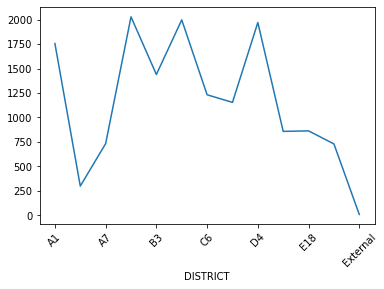

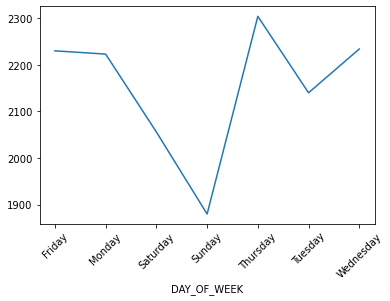

In [355]:
import seaborn

data_offense_count_by_district = data.groupby(['DISTRICT']).count()['OFFENSE_CATEGORY']
print(data_offense_count_by_district)

data_offense_count_by_dow = data.groupby(['DAY_OF_WEEK']).count()['OFFENSE_CATEGORY']
print(data_offense_count_by_dow)

data_offense_count_by_district.plot()
plt.xticks(rotation=45)
plt.show()
data_offense_count_by_dow.plot()
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:xlabel='DISTRICT,DAY_OF_WEEK'>

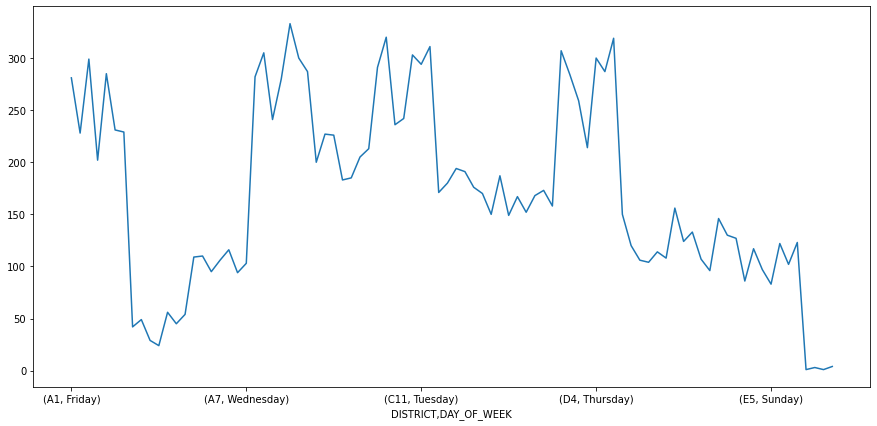

In [356]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby(['DISTRICT','DAY_OF_WEEK']).count()['OFFENSE_CATEGORY'].plot(ax=ax)

<AxesSubplot:xlabel='DAY_OF_WEEK'>

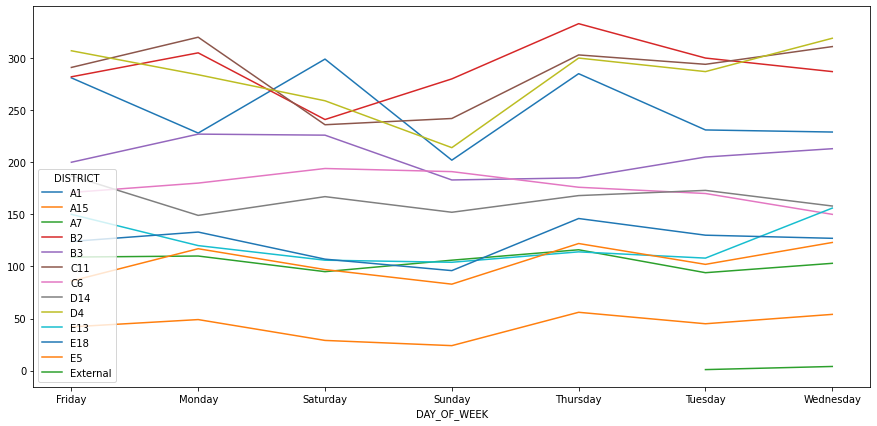

In [357]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
data.groupby(['DAY_OF_WEEK', 'DISTRICT']).count()['OFFENSE_CATEGORY'].unstack().plot(ax=ax)

In [358]:
data_offense_count_by_district.head()

DISTRICT
A1     1755
A15     299
A7      733
B2     2028
B3     1439
Name: OFFENSE_CATEGORY, dtype: int64

[Text(0.5, 0, 'DISTRICT')]

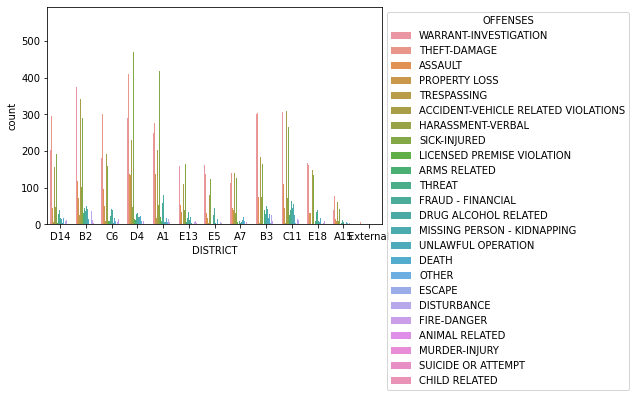

In [359]:
p = sns.countplot(data=data, x='DISTRICT', hue='OFFENSE_CATEGORY')
p.legend(title='OFFENSES', bbox_to_anchor=(1, 1), loc='upper left')
p.set(xlabel='DISTRICT')

In [596]:
data.isnull().sum()

DISTRICT              0
SHOOTING              0
MONTH                 0
DAY_OF_WEEK           0
HOUR                  0
DAY                   0
Hour                  0
OFFENSE_CATEGORY    132
dtype: int64

In [723]:
data.head()

,DISTRICT,SHOOTING,MONTH,DAY_OF_WEEK,HOUR,DAY,Hour,OFFENSE_CATEGORY
0,D14,0,2,Wednesday,0,02,00:00:00,WARRANT-INVESTIGATION
1,B2,0,2,Saturday,18,05,18:25:00,THEFT-DAMAGE
2,C6,0,1,Sunday,0,09,00:00:00,THEFT-DAMAGE
3,D4,0,3,Saturday,13,05,13:00:00,THEFT-DAMAGE
4,D14,0,2,Monday,12,14,12:30:00,THEFT-DAMAGE


In [725]:
data.shape

(15199, 8)

In [807]:
district_list=list(data.DISTRICT.unique()).sort()

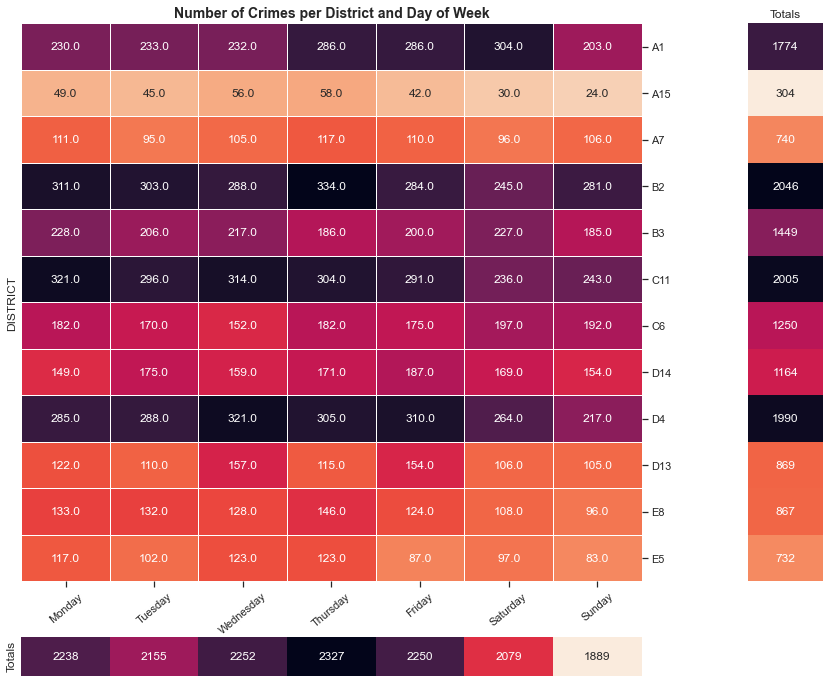

In [792]:
# Source:
# https://stackoverflow.com/questions/33379261/how-can-i-have-a-bar-next-to-python-seaborn-heatmap-which-shows-the-summation-of

fig = plt.figure(figsize=(16,12))
ax1 = plt.subplot2grid((14,10), (0,0), rowspan=12, colspan=7)
ax2 = plt.subplot2grid((14,10), (0,8), rowspan=12, colspan=1)
ax3 = plt.subplot2grid((14,10), (13,0), rowspan=1, colspan=7)

table_pivot= data.pivot_table("Hour",
                              ["DISTRICT"],
                              columns="DAY_OF_WEEK",
                              aggfunc = "count")

column_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
table_pivot2 = table_pivot.reindex(column_order, axis=1)
table_pivot2 = table_pivot2.drop("External", axis=0)
cmap = sns.cm.rocket_r

sns.heatmap(table_pivot2,
            ax=ax1,
            annot = True,
            fmt="0.1f",
            linewidths=.8,
            vmin=-0.05,
            cmap = cmap,
            cbar = False).set_title('Number of Crimes per District and Day of Week',
                                                        fontsize=14, fontweight='bold')

y_axis_labels=['A1','A15','A7','B2','B3','C11','C6','D14','D4','D13','E8','E5']
ax1.xaxis.tick_bottom()
ax1.set_xticklabels(table_pivot2.columns,rotation=40)
ax1.yaxis.tick_right()
ax1.set_yticklabels(y_axis_labels, rotation='horizontal')

sns.heatmap((pd.DataFrame(table_pivot2.sum(axis=0))).transpose(),
            ax=ax3,
            annot=True,
            fmt='g',
            cmap=cmap,
            cbar=False,
            xticklabels=False,
            yticklabels=False).set(xlabel='', ylabel='Totals')
sns.heatmap(pd.DataFrame(table_pivot2.sum(axis=1)),
            ax=ax2,
            annot=True,
            fmt='g',
            cmap=cmap,
            cbar=False,
            xticklabels=False,
            yticklabels=False).set(xlabel='', ylabel='', title='Totals');


In [808]:
table_pivot2.head()

DAY_OF_WEEK,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
DISTRICT,,,,,,,
A1,230.0,233.0,232.0,286.0,286.0,304.0,203.0
A15,49.0,45.0,56.0,58.0,42.0,30.0,24.0
A7,111.0,95.0,105.0,117.0,110.0,96.0,106.0
B2,311.0,303.0,288.0,334.0,284.0,245.0,281.0
B3,228.0,206.0,217.0,186.0,200.0,227.0,185.0


In [811]:
data.head()

,DISTRICT,SHOOTING,MONTH,DAY_OF_WEEK,HOUR,DAY,Hour,OFFENSE_CATEGORY
0,D14,0,2,Wednesday,0,02,00:00:00,WARRANT-INVESTIGATION
1,B2,0,2,Saturday,18,05,18:25:00,THEFT-DAMAGE
2,C6,0,1,Sunday,0,09,00:00:00,THEFT-DAMAGE
3,D4,0,3,Saturday,13,05,13:00:00,THEFT-DAMAGE
4,D14,0,2,Monday,12,14,12:30:00,THEFT-DAMAGE


In [836]:
table_pivot= data.pivot_table("MONTH",
                              ["DISTRICT"],
                              columns="OFFENSE_CATEGORY",
                              aggfunc = "count")
table_pivot.drop(['External'], axis=0)
table_pivot.drop(['OTHER'], axis=1)

OFFENSE_CATEGORY,ACCIDENT-VEHICLE RELATED VIOLATIONS,ANIMAL RELATED,ARMS RELATED,ASSAULT,CHILD RELATED,DEATH,DISTURBANCE,DRUG ALCOHOL RELATED,ESCAPE,FIRE-DANGER,FRAUD - FINANCIAL,HARASSMENT-VERBAL,LICENSED PREMISE VIOLATION,MISSING PERSON - KIDNAPPING,MURDER-INJURY,PROPERTY LOSS,SICK-INJURED,SUICIDE OR ATTEMPT,THEFT-DAMAGE,THREAT,TRESPASSING,UNLAWFUL OPERATION,WARRANT-INVESTIGATION
DISTRICT,,,,,,,,,,,,,,,,,,,,,,,
A1,202.0,1.0,10.0,145.0,NaN,17.0,13.0,81.0,1.0,6.0,58.0,52.0,20.0,6.0,2.0,137.0,417.0,1.0,276.0,33.0,17.0,5.0,248.0
A15,60.0,NaN,4.0,14.0,NaN,6.0,3.0,7.0,NaN,1.0,9.0,9.0,1.0,2.0,NaN,10.0,41.0,NaN,77.0,11.0,1.0,1.0,39.0
A7,141.0,NaN,2.0,45.0,NaN,20.0,NaN,4.0,NaN,7.0,19.0,32.0,5.0,6.0,NaN,39.0,125.0,NaN,140.0,9.0,5.0,12.0,112.0
B2,343.0,4.0,32.0,117.0,NaN,34.0,37.0,49.0,1.0,11.0,36.0,101.0,4.0,42.0,1.0,72.0,291.0,2.0,393.0,44.0,25.0,14.0,374.0
B3,183.0,2.0,38.0,75.0,2.0,29.0,24.0,51.0,1.0,9.0,29.0,74.0,1.0,42.0,NaN,53.0,165.0,2.0,303.0,32.0,4.0,16.0,301.0
C11,308.0,2.0,24.0,110.0,NaN,38.0,14.0,43.0,NaN,11.0,64.0,72.0,3.0,56.0,1.0,44.0,265.0,NaN,565.0,39.0,4.0,25.0,305.0
C6,191.0,1.0,10.0,97.0,1.0,18.0,6.0,39.0,2.0,13.0,41.0,46.0,10.0,23.0,NaN,49.0,158.0,1.0,302.0,22.0,8.0,3.0,181.0
D14,157.0,NaN,1.0,62.0,NaN,17.0,10.0,16.0,NaN,11.0,38.0,48.0,3.0,14.0,NaN,45.0,192.0,2.0,295.0,28.0,5.0,3.0,202.0
D4,231.0,1.0,11.0,138.0,NaN,23.0,11.0,30.0,NaN,10.0,68.0,47.0,13.0,21.0,1.0,133.0,470.0,NaN,409.0,27.0,8.0,19.0,290.0


In [841]:
table_pivot= data.pivot_table("MONTH",
                              ["HOUR"],
                              columns="DISTRICT",
                              aggfunc = "count")
table_pivot3=table_pivot.drop(['External'], axis=1)
table_pivot3

DISTRICT,A1,A15,A7,B2,B3,C11,C6,D14,D4,E13,E18,E5
HOUR,,,,,,,,,,,,
0,139.0,18.0,45.0,153.0,102.0,148.0,92.0,81.0,108.0,56.0,66.0,32.0
1,78.0,4.0,24.0,68.0,38.0,47.0,33.0,41.0,49.0,15.0,19.0,8.0
2,79.0,1.0,16.0,44.0,30.0,41.0,19.0,25.0,34.0,18.0,12.0,6.0
3,29.0,1.0,24.0,43.0,18.0,25.0,17.0,30.0,27.0,5.0,9.0,6.0
4,16.0,2.0,5.0,30.0,12.0,31.0,13.0,13.0,28.0,3.0,11.0,6.0
5,14.0,5.0,7.0,23.0,17.0,37.0,14.0,13.0,20.0,6.0,8.0,9.0
6,14.0,6.0,11.0,33.0,18.0,36.0,19.0,10.0,33.0,10.0,10.0,12.0
7,40.0,8.0,20.0,62.0,33.0,51.0,54.0,25.0,48.0,18.0,33.0,31.0
8,54.0,26.0,32.0,82.0,45.0,81.0,58.0,47.0,69.0,37.0,25.0,27.0


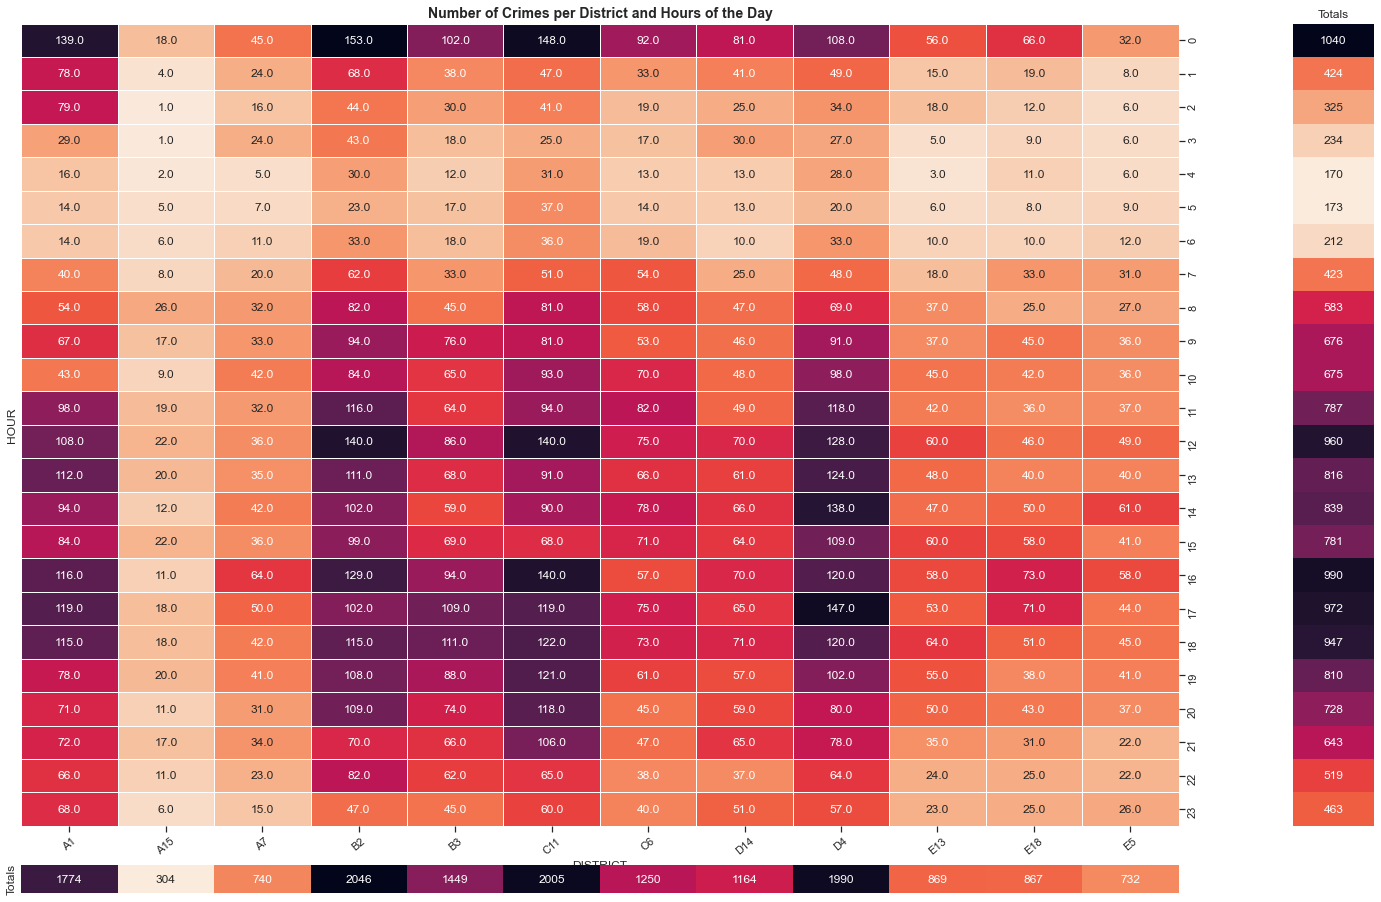

In [851]:
# Source:
# https://stackoverflow.com/questions/33379261/how-can-i-have-a-bar-next-to-python-seaborn-heatmap-which-shows-the-summation-of

fig = plt.figure(figsize=(26,16))
ax1 = plt.subplot2grid((26,15), (0,0), rowspan=24, colspan=12)
ax2 = plt.subplot2grid((26,15), (0,13), rowspan=24, colspan=1)
ax3 = plt.subplot2grid((26,15), (25,0), rowspan=1, colspan=12)

cmap = sns.cm.rocket_r

sns.heatmap(table_pivot3,
            ax=ax1,
            annot = True,
            fmt="0.1f",
            linewidths=.8,
            vmin=-0.05,
            cmap = cmap,
            cbar = False).set_title('Number of Crimes per District and Hours of the Day',
                                                        fontsize=14, fontweight='bold')


ax1.xaxis.tick_bottom()
ax1.set_xticklabels(table_pivot3.columns,rotation=40)
ax1.yaxis.tick_right()


sns.heatmap((pd.DataFrame(table_pivot3.sum(axis=0))).transpose(),
            ax=ax3,
            annot=True,
            fmt='g',
            cmap=cmap,
            cbar=False,
            xticklabels=False,
            yticklabels=False).set(xlabel='', ylabel='Totals')
sns.heatmap(pd.DataFrame(table_pivot3.sum(axis=1)),
            ax=ax2,
            annot=True,
            fmt='g',
            cmap=cmap,
            cbar=False,
            xticklabels=False,
            yticklabels=False).set(xlabel='', ylabel='', title='Totals');



In [ ]:
(sns
 .FacetGrid(df,
              hue = "cut",
              height = 5,
              xlim = (0, 10000))
 .map(sns.kdeplot, "price", shade= True)
 .add_legend()
);

In [855]:
data['OFFENSE_DESCRIPTION'].nunique()

KeyError: 'OFFENSE_DESCRIPTION'

In [360]:
data.nunique()

OFFENSE_DESCRIPTION     112
DISTRICT                 13
SHOOTING                  2
MONTH                     3
DAY_OF_WEEK               7
HOUR                     24
DAY                      31
Hour                   1428
OFFENSE_CATEGORY         24
dtype: int64

In [942]:
data_grouped_by_district=data.drop(columns="OFFENSE_DESCRIPTION")
data_grouped_by_district.groupby(["DISTRICT", "DAY_OF_WEEK"])["OFFENSE_CATEGORY"].count()

DISTRICT  DAY_OF_WEEK
A1        Friday         281
          Monday         228
          Saturday       299
          Sunday         202
          Thursday       285
          Tuesday        231
          Wednesday      229
A15       Friday          42
          Monday          49
          Saturday        29
          Sunday          24
          Thursday        56
          Tuesday         45
          Wednesday       54
A7        Friday         109
          Monday         110
          Saturday        95
          Sunday         106
          Thursday       116
          Tuesday         94
          Wednesday      103
B2        Friday         282
          Monday         305
          Saturday       241
          Sunday         280
          Thursday       333
          Tuesday        300
          Wednesday      287
B3        Friday         200
          Monday         227
          Saturday       226
          Sunday         183
          Thursday       185
          Tuesday    

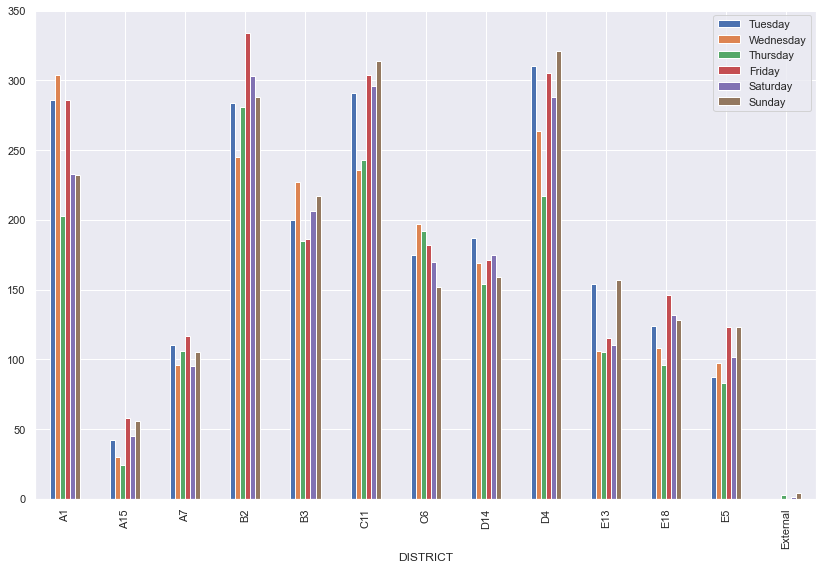

In [943]:
data_only_weekend=data[data.DAY_OF_WEEK != 'Monday']
data_only_weekend.groupby(["DAY_OF_WEEK"]).DISTRICT.value_counts().unstack(0).plot.bar(figsize=(14,9))
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.legend(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6221 entries, 1 to 15242
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OFFENSE_DESCRIPTION  6221 non-null   object 
 1   DISTRICT             6221 non-null   object 
 2   SHOOTING             6221 non-null   int64  
 3   OCCURRED_ON_DATE     6221 non-null   object 
 4   YEAR                 6221 non-null   int64  
 5   MONTH                6221 non-null   int64  
 6   DAY_OF_WEEK          6221 non-null   object 
 7   HOUR                 6221 non-null   int64  
 8   Lat                  6221 non-null   float64
 9   Long                 6221 non-null   float64
 10  Location             6221 non-null   object 
 11  DAY                  6221 non-null   object 
 12  Hour                 6221 non-null   object 
 13  OFFENSE_CATEGORY     6166 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 729.0+ KB


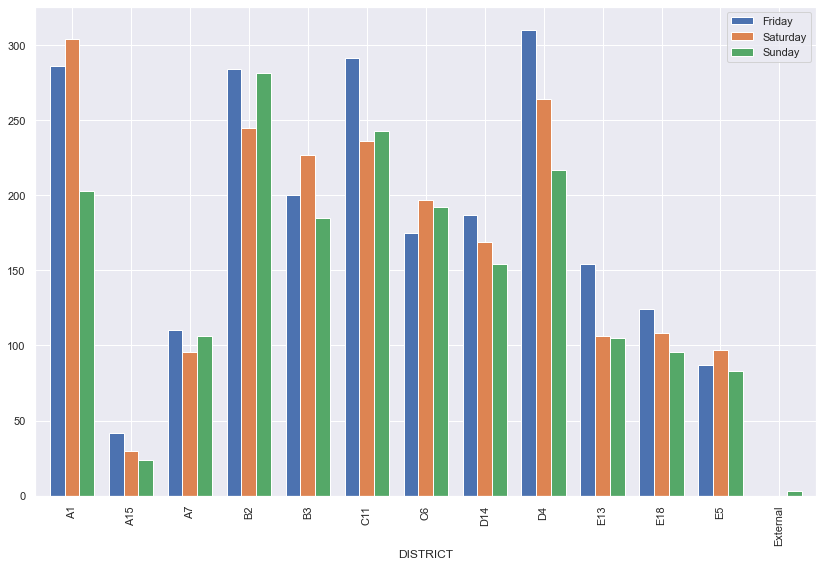

In [944]:
weekend_days=['Friday', 'Saturday', 'Sunday']
weekend_data = data[data['DAY_OF_WEEK'].isin(weekend_days)] 
weekend_data.info()

weekend_data.groupby(["DAY_OF_WEEK"]).DISTRICT.value_counts().unstack(0).plot.bar(figsize=(14,9), width=0.75)
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.legend(['Friday', 'Saturday', 'Sunday'])

In [ ]:
data_grpby_dist_month_day.drop(["OFFENSE_DESCRIPTION"])

In [570]:
import pandas as pd
import numpy as np

data.head()

,DISTRICT,SHOOTING,MONTH,DAY_OF_WEEK,HOUR,DAY,Hour,OFFENSE_CATEGORY
0,D14,0,2,Wednesday,0,02,00:00:00,WARRANT-INVESTIGATION
1,B2,0,2,Saturday,18,05,18:25:00,THEFT-DAMAGE
2,C6,0,1,Sunday,0,09,00:00:00,THEFT-DAMAGE
3,D4,0,3,Saturday,13,05,13:00:00,THEFT-DAMAGE
4,D14,0,2,Monday,12,14,12:30:00,THEFT-DAMAGE


In [588]:
data_grpby_dist=data.groupby(["DISTRICT"])
data_grpby_dist.head()

,DISTRICT,SHOOTING,MONTH,DAY_OF_WEEK,HOUR,DAY,Hour,OFFENSE_CATEGORY
0,D14,0,2,Wednesday,0,02,00:00:00,WARRANT-INVESTIGATION
1,B2,0,2,Saturday,18,05,18:25:00,THEFT-DAMAGE
2,C6,0,1,Sunday,0,09,00:00:00,THEFT-DAMAGE
3,D4,0,3,Saturday,13,05,13:00:00,THEFT-DAMAGE
4,D14,0,2,Monday,12,14,12:30:00,THEFT-DAMAGE
5,D4,0,3,Friday,10,11,10:45:00,WARRANT-INVESTIGATION
6,C6,0,2,Tuesday,22,08,22:37:00,ASSAULT
7,A1,0,2,Sunday,10,27,10:07:00,THEFT-DAMAGE
8,C6,0,1,Friday,15,14,15:20:00,THEFT-DAMAGE
9,E13,0,1,Sunday,13,23,13:15:00,PROPERTY LOSS


In [887]:
data_grpby_dist.head(10)

,DISTRICT,SHOOTING,MONTH,DAY_OF_WEEK,HOUR,DAY,Hour,OFFENSE_CATEGORY,District_Names
0,D14,0,2,Wednesday,0,02,00:00:00,WARRANT-INVESTIGATION,NaN
1,B2,0,2,Saturday,18,05,18:25:00,THEFT-DAMAGE,NaN
2,C6,0,1,Sunday,0,09,00:00:00,THEFT-DAMAGE,NaN
3,D4,0,3,Saturday,13,05,13:00:00,THEFT-DAMAGE,NaN
4,D14,0,2,Monday,12,14,12:30:00,THEFT-DAMAGE,NaN
5,D4,0,3,Friday,10,11,10:45:00,WARRANT-INVESTIGATION,NaN
6,C6,0,2,Tuesday,22,08,22:37:00,ASSAULT,NaN
7,A1,0,2,Sunday,10,27,10:07:00,THEFT-DAMAGE,NaN
8,C6,0,1,Friday,15,14,15:20:00,THEFT-DAMAGE,NaN
9,E13,0,1,Sunday,13,23,13:15:00,PROPERTY LOSS,NaN


In [889]:
District_Codes=list(data['DISTRICT'].unique())
District_Codes

['D14',
 'B2',
 'C6',
 'D4',
 'A1',
 'E13',
 'E5',
 'A7',
 'B3',
 'C11',
 'E18',
 'A15',
 'External']

In [890]:
District_Codes.remove('External')

In [897]:
District_Names=['Brighton', 'Roxbury', 'South Boston', 'South End', 'Downtown', 'Jamaica Plain', 'West Roxbury', 'East Boston', 'Mattapan', 'Dorchester', 'Hyde Park', 'Charlestown']
District_Df=pd.DataFrame()
District_Df['DISTRICT']=District_Codes
District_Df['District_Names']=District_Names
District_Df.head()

,DISTRICT,District_Names
0,D14,Brighton
1,B2,Roxbury
2,C6,South Boston
3,D4,South End
4,A1,Downtown


In [945]:
data=data.merge(District_Df, on ='DISTRICT', how ='inner')
data.head()

,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,Lat,Long,Location,DAY,Hour,OFFENSE_CATEGORY,District_Names
0,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,0,2022-02-02 00:00:00,2022,2,Wednesday,0,42.343081,-71.141723,"(42.34308127134165, -71.14172267328729)",02,00:00:00,WARRANT-INVESTIGATION,Brighton
1,LARCENY ALL OTHERS,D14,0,2022-02-14 12:30:00,2022,2,Monday,12,42.349056,-71.150498,"(42.34905600030506, -71.15049849975023)",14,12:30:00,THEFT-DAMAGE,Brighton
2,INVESTIGATE PERSON,D14,0,2022-03-25 02:11:00,2022,3,Friday,2,42.336066,-71.150627,"(42.33606570362599, -71.15062719843623)",25,02:11:00,WARRANT-INVESTIGATION,Brighton
3,M/V ACCIDENT - INVOLVING PEDESTRIAN - INJURY,D14,0,2022-03-24 23:18:00,2022,3,Thursday,23,42.352790,-71.130180,"(42.352789963988975, -71.13017996057994)",24,23:18:00,ACCIDENT-VEHICLE RELATED VIOLATIONS,Brighton
4,ASSAULT - SIMPLE,D14,0,2022-03-24 21:17:00,2022,3,Thursday,21,42.356205,-71.154219,"(42.35620473429912, -71.154218538476)",24,21:17:00,ASSAULT,Brighton


In [946]:
data.tail()

,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,Lat,Long,Location,DAY,Hour,OFFENSE_CATEGORY,District_Names
15185,VANDALISM,A15,0,2022-03-19 18:00:00,2022,3,Saturday,18,42.376371,-71.065574,"(42.37637108868749, -71.06557375371625)",19,18:00:00,THEFT-DAMAGE,Charlestown
15186,TOWED MOTOR VEHICLE,A15,0,2022-03-21 08:29:00,2022,3,Monday,8,42.374908,-71.061710,"(42.37490831477063, -71.0617101230599)",21,08:29:00,ACCIDENT-VEHICLE RELATED VIOLATIONS,Charlestown
15187,M/V ACCIDENT - PROPERTY DAMAGE,A15,0,2022-03-21 07:40:00,2022,3,Monday,7,42.375484,-71.068728,"(42.37548425241638, -71.0687276624078)",21,07:40:00,ACCIDENT-VEHICLE RELATED VIOLATIONS,Charlestown
15188,SICK ASSIST,A15,0,2022-03-20 21:45:00,2022,3,Sunday,21,42.384262,-71.078600,"(42.38426160029095, -71.0785997851702)",20,21:45:00,SICK-INJURED,Charlestown
15189,MISSING PERSON,A15,0,2022-03-20 01:07:00,2022,3,Sunday,1,42.380205,-71.057414,"(42.380204747487696, -71.05741400352046)",20,01:07:00,MISSING PERSON - KIDNAPPING,Charlestown


In [948]:
import csv
data.to_csv(r'/Users/mervecakaraydinbas/cuneydyasin/Python Reference Notebooks HWs Cheatsheets/Boston Crime Report/boston_crime_data_for_tableau.csv', header = True)

In [952]:
df=pd.DataFrame(data)

In [954]:
df.head()

,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,Lat,Long,Location,DAY,Hour,OFFENSE_CATEGORY,District_Names
0,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,0,2022-02-02 00:00:00,2022,2,Wednesday,0,42.343081,-71.141723,"(42.34308127134165, -71.14172267328729)",02,00:00:00,WARRANT-INVESTIGATION,Brighton
1,LARCENY ALL OTHERS,D14,0,2022-02-14 12:30:00,2022,2,Monday,12,42.349056,-71.150498,"(42.34905600030506, -71.15049849975023)",14,12:30:00,THEFT-DAMAGE,Brighton
2,INVESTIGATE PERSON,D14,0,2022-03-25 02:11:00,2022,3,Friday,2,42.336066,-71.150627,"(42.33606570362599, -71.15062719843623)",25,02:11:00,WARRANT-INVESTIGATION,Brighton
3,M/V ACCIDENT - INVOLVING PEDESTRIAN - INJURY,D14,0,2022-03-24 23:18:00,2022,3,Thursday,23,42.352790,-71.130180,"(42.352789963988975, -71.13017996057994)",24,23:18:00,ACCIDENT-VEHICLE RELATED VIOLATIONS,Brighton
4,ASSAULT - SIMPLE,D14,0,2022-03-24 21:17:00,2022,3,Thursday,21,42.356205,-71.154219,"(42.35620473429912, -71.154218538476)",24,21:17:00,ASSAULT,Brighton


In [965]:
data.sort_values('Lat').head(20)

,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,Lat,Long,Location,DAY,Hour,OFFENSE_CATEGORY,District_Names
1609,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,B2,0,2022-03-05 03:10:00,2022,3,Saturday,3,0.0,0.0,"(0, 0)",05,03:10:00,WARRANT-INVESTIGATION,Roxbury
7955,INVESTIGATE PERSON,A1,0,2022-01-06 12:00:00,2022,1,Thursday,12,0.0,0.0,"(0, 0)",06,12:00:00,WARRANT-INVESTIGATION,Downtown
7951,AUTO THEFT,A1,0,2022-01-13 19:30:00,2022,1,Thursday,19,0.0,0.0,"(0, 0)",13,19:30:00,THEFT-DAMAGE,Downtown
4124,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,C6,0,2022-01-22 13:17:00,2022,1,Saturday,13,0.0,0.0,"(0, 0)",22,13:17:00,WARRANT-INVESTIGATION,South Boston
7939,SICK/INJURED/MEDICAL - POLICE,A1,0,2022-01-14 14:33:00,2022,1,Friday,14,0.0,0.0,"(0, 0)",14,14:33:00,SICK-INJURED,Downtown
4132,INVESTIGATE PROPERTY,C6,0,2022-01-21 18:55:00,2022,1,Friday,18,0.0,0.0,"(0, 0)",21,18:55:00,WARRANT-INVESTIGATION,South Boston
10921,INVESTIGATE PROPERTY,B3,0,2022-03-04 06:36:00,2022,3,Friday,6,0.0,0.0,"(0, 0)",04,06:36:00,WARRANT-INVESTIGATION,Mattapan
4137,PROPERTY - FOUND,C6,0,2022-01-21 13:25:00,2022,1,Friday,13,0.0,0.0,"(0, 0)",21,13:25:00,PROPERTY LOSS,South Boston
7906,PROPERTY - LOST/ MISSING,A1,0,2022-01-15 20:00:00,2022,1,Saturday,20,0.0,0.0,"(0, 0)",15,20:00:00,PROPERTY LOSS,Downtown
4146,LARCENY SHOPLIFTING,C6,0,2022-01-15 17:20:00,2022,1,Saturday,17,0.0,0.0,"(0, 0)",15,17:20:00,SICK-INJURED,South Boston


In [969]:
data = data[data.Lat != 0]
data.sort_values('Lat', ascending=False).head(20)

,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,Lat,Long,Location,DAY,Hour,OFFENSE_CATEGORY,District_Names
9842,TOWED MOTOR VEHICLE,A7,0,2022-03-23 00:59:00,2022,3,Wednesday,0,42.395042,-71.010177,"(42.39504158023912, -71.01017731687807)",23,00:59:00,ACCIDENT-VEHICLE RELATED VIOLATIONS,East Boston
10099,M/V ACCIDENT - PERSONAL INJURY,A7,0,2022-02-21 15:46:00,2022,2,Monday,15,42.393529,-71.011582,"(42.39352862185009, -71.01158244019425)",21,15:46:00,ACCIDENT-VEHICLE RELATED VIOLATIONS,East Boston
10342,M/V ACCIDENT - PROPERTY DAMAGE,A7,0,2022-01-23 19:33:00,2022,1,Sunday,19,42.393529,-71.011582,"(42.39352862185009, -71.01158244019425)",23,19:33:00,ACCIDENT-VEHICLE RELATED VIOLATIONS,East Boston
10501,M/V ACCIDENT - OTHER,A7,0,2022-01-07 04:09:00,2022,1,Friday,4,42.393529,-71.011582,"(42.39352862185009, -71.01158244019425)",07,04:09:00,ACCIDENT-VEHICLE RELATED VIOLATIONS,East Boston
10256,INVESTIGATE PERSON,A7,0,2022-02-04 12:16:00,2022,2,Friday,12,42.393273,-71.007939,"(42.39327288451406, -71.00793914033349)",04,12:16:00,WARRANT-INVESTIGATION,East Boston
10242,VANDALISM,A7,0,2022-02-06 01:58:00,2022,2,Sunday,1,42.392697,-71.008424,"(42.39269663200214, -71.00842413382442)",06,01:58:00,THEFT-DAMAGE,East Boston
9858,THREATS TO DO BODILY HARM,A7,0,2022-03-19 15:45:00,2022,3,Saturday,15,42.392697,-71.008424,"(42.39269663200214, -71.00842413382442)",19,15:45:00,THREAT,East Boston
15097,M/V ACCIDENT - PERSONAL INJURY,A15,0,2022-01-25 09:48:00,2022,1,Tuesday,9,42.392430,-71.068945,"(42.3924302970557, -71.06894465125617)",25,09:48:00,ACCIDENT-VEHICLE RELATED VIOLATIONS,Charlestown
10240,VAL - OPERATING W/O AUTHORIZATION LAWFUL,A7,0,2022-02-06 02:00:00,2022,2,Sunday,2,42.392139,-71.005811,"(42.3921390421385, -71.00581070996117)",06,02:00:00,UNLAWFUL OPERATION,East Boston
10428,SUDDEN DEATH,A7,0,2022-01-15 14:25:00,2022,1,Saturday,14,42.392139,-71.005811,"(42.3921390421385, -71.00581070996117)",15,14:25:00,DEATH,East Boston


In [970]:
data.to_csv(r'/Users/mervecakaraydinbas/cuneydyasin/Python Reference Notebooks HWs Cheatsheets/Boston Crime Report/boston_crime_data_for_tableau.csv', header = True)

In [971]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SHOOTING,14582.0,0.008778,0.093282,0.000000,0.000000,0.000000,0.000000,1.000000
YEAR,14582.0,2022.000000,0.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000
MONTH,14582.0,1.931079,0.803332,1.000000,1.000000,2.000000,3.000000,3.000000
HOUR,14582.0,12.821424,6.419790,0.000000,9.000000,14.000000,18.000000,23.000000
Lat,14582.0,42.322817,0.032343,42.233342,42.297555,42.328597,42.349015,42.395042
Long,14582.0,-71.083948,0.031748,-71.178674,-71.099958,-71.077323,-71.060880,-70.953726


In [972]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14582 entries, 0 to 15189
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OFFENSE_DESCRIPTION  14582 non-null  object 
 1   DISTRICT             14582 non-null  object 
 2   SHOOTING             14582 non-null  int64  
 3   OCCURRED_ON_DATE     14582 non-null  object 
 4   YEAR                 14582 non-null  int64  
 5   MONTH                14582 non-null  int64  
 6   DAY_OF_WEEK          14582 non-null  object 
 7   HOUR                 14582 non-null  int64  
 8   Lat                  14582 non-null  float64
 9   Long                 14582 non-null  float64
 10  Location             14582 non-null  object 
 11  DAY                  14582 non-null  object 
 12  Hour                 14582 non-null  object 
 13  OFFENSE_CATEGORY     14453 non-null  object 
 14  District_Names       14582 non-null  object 
dtypes: float64(2), int64(4), object(9)
m